## Business Problem 
### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
### Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.
### Our overall collection of tweets was split in the ratio of 65:35 into training and testing data. Out of the testing data, 30% is public and the rest is private.

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
import nltk 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_colwidth',None)
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
## reading the files 
train=pd.read_csv('train_E6oV3lV.csv')
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


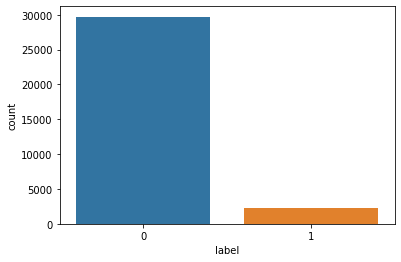

In [6]:
sns.countplot(x='label',data=train)

## Tweets Preprocessing and Cleaning

In [7]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [8]:
# removing @user from data 
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")

In [9]:
# removing unnecesary words and symbols
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [10]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalised in in #calgary #wso condemns act


In [11]:
## Remove the words whose length is less than 3 characters
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,that youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,nina turner airwaves trying wrap herself mantle genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalised #calgary #wso condemns


In [13]:
# Creating a similar alphabetic pattern of all words 
train['tidy_tweet'] = train['tidy_tweet'].str.lower()

In [14]:
## tokenzing the words 
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: x.split())

In [15]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]"
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, with, time]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,"[that, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,"[nina, turner, airwaves, trying, wrap, herself, mantle, genuine, hero, like, shirley, chisolm, #shame, #imwithher]"
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,"[listening, songs, monday, morning, work]"
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act","[#sikh, #temple, vandalised, #calgary, #wso, condemns]"


In [16]:
import nltk # Natural Language ToolKit, for stopping, stemming, lemmatization
from nltk.corpus import stopwords # imports the stopwords we can use
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatizer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
## Removing the stopwords 
train['tidy_tweet'] = train.tidy_tweet.apply(lambda x: [w for w in x if not w in stopwords.words('english')])

In [18]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[father, dysfunctional, selfish, drags, kids, dysfunction, #run]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thanks, #lyft, credit, cause, offer, wheelchair, vans, #disapointed, #getthanked]"
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, time]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,[youuu]
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,"[nina, turner, airwaves, trying, wrap, mantle, genuine, hero, like, shirley, chisolm, #shame, #imwithher]"
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,"[listening, songs, monday, morning, work]"
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act","[#sikh, #temple, vandalised, #calgary, #wso, condemns]"


In [19]:
## stemming=PorterStemmer()
## train['tokenized_words'] = train.tokenized_words.apply(lambda x: [stemming.stem(i) for i in x]) 

In [20]:
## lammetizing the preprocessiong sentence 
lemmatizer=WordNetLemmatizer()
train['tidy_tweet'] = train.tidy_tweet.apply(lambda x: [lemmatizer.lemmatize(i, 'v') for i in x ])

In [21]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,"[father, dysfunctional, selfish, drag, kid, dysfunction, #run]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,"[thank, #lyft, credit, cause, offer, wheelchair, vans, #disapointed, #getthanked]"
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,"[#model, love, take, time]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,[youuu]
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,"[nina, turner, airwaves, try, wrap, mantle, genuine, hero, like, shirley, chisolm, #shame, #imwithher]"
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,"[listen, songs, monday, morning, work]"
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act","[#sikh, #temple, vandalise, #calgary, #wso, condemn]"


In [22]:
## joining the tokenized words 
for i in range(len(train['tidy_tweet'])):
   train['tidy_tweet'][i] = ' '.join( train['tidy_tweet'][i])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
train

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drag kid dysfunction #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit cause offer wheelchair vans #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,nina turner airwaves try wrap mantle genuine hero like shirley chisolm #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listen songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",#sikh #temple vandalise #calgary #wso condemn


## Understanding the impact of Hashtags on tweets sentiment

In [24]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(train['tidy_tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

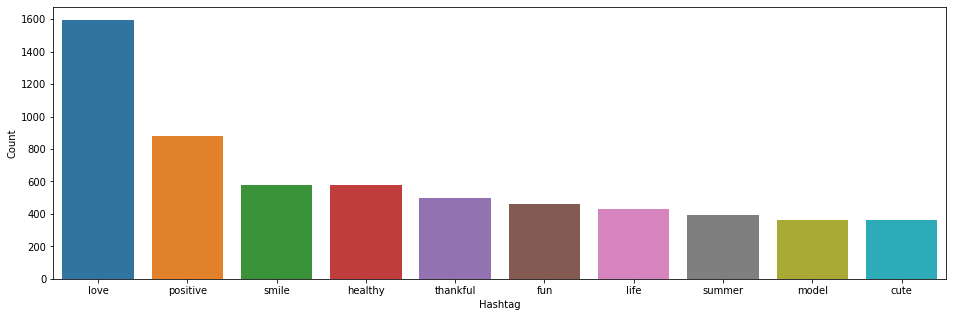

In [26]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags from non racist/sexist tweets  
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

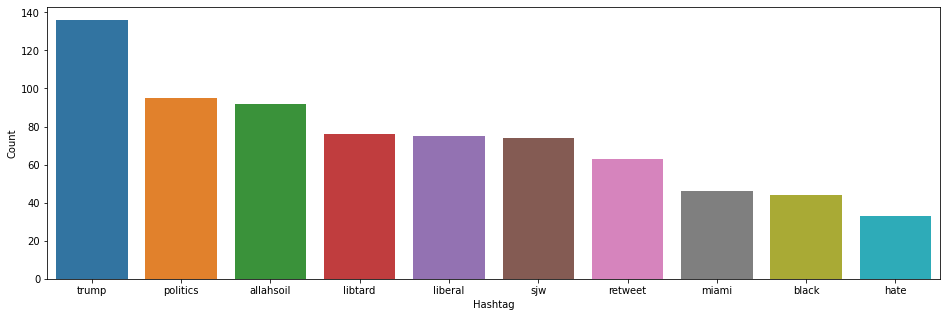

In [27]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags from racist/sexist tweets
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(train['tidy_tweet'])

In [29]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [30]:

test['tidy_tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")
test['tidy_tweet'] = test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
test['tidy_tweet'] =test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



In [31]:
test['tidy_tweet'] = test['tidy_tweet'].apply(lambda x: x.split())

In [32]:


test['tidy_tweet'] = test.tidy_tweet.apply(lambda x: [w for w in x if not w in stopwords.words('english')])



In [33]:
test['tidy_tweet'] = test.tidy_tweet.apply(lambda x: [lemmatizer.lemmatize(i, 'v') for i in x ])

In [34]:
for i in range(len(test['tidy_tweet'])):
    test['tidy_tweet'][i] = ' '.join( test['tidy_tweet'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
test

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists want everyone #birds #movie
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal #acne #altwaystoheal #healthy #healing
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",curse child book reservations already #harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amaze hilarious #nephew ahmir uncle dave love miss
...,...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,think factory leave right polarisation #trump #uselections #leadership #politics #brexit #blm
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feel like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio use word like assets liability never #clinton thee word #radicalization
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset lead culture development organizations #work #mindset


In [36]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [37]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1])

In [38]:
HT_regular = sum(HT_regular,[])

In [39]:
HT_regular 

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [40]:
HT_negative = sum(HT_negative,[])

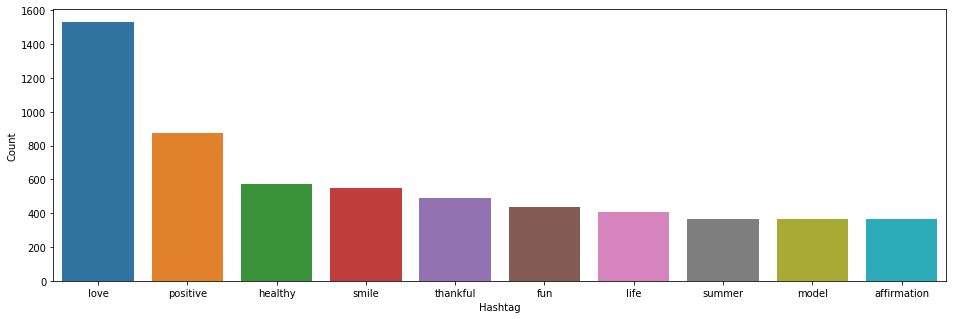

In [41]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


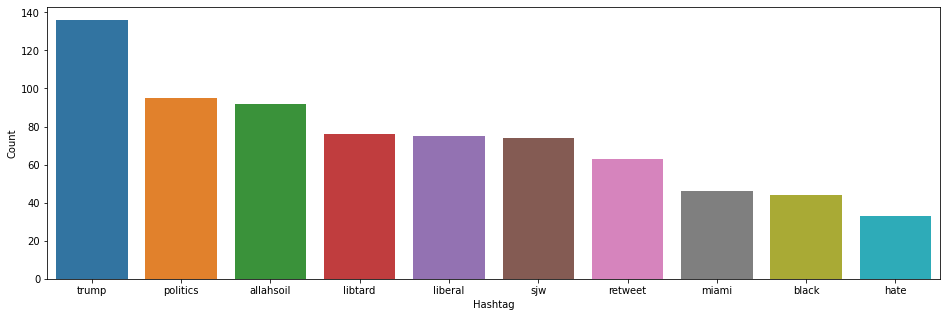

In [42]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [43]:
test_file_tweet=test['tidy_tweet']

In [44]:
test_file_tweet

0                               #studiolife #aislife #requires #passion #dedication #willpower find #newmaterials
1                                                                #white #supremacists want everyone #birds #movie
2                                                           safe ways heal #acne #altwaystoheal #healthy #healing
3                                        curse child book reservations already #harrypotter #pottermore #favorite
4                                                      #bihday amaze hilarious #nephew ahmir uncle dave love miss
                                                           ...                                                   
17192               think factory leave right polarisation #trump #uselections #leadership #politics #brexit #blm
17193                            feel like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
17194    #hillary #campaigned today #ohio use word like assets liability never #clinton 

In [45]:
X_test_tfidf = tfidf_vectorizer.transform(test_file_tweet)


In [46]:
print(X_test_tfidf.shape)
print(type(X_test_tfidf))
X_test = X_test_tfidf.toarray()


(17197, 1000)
<class 'scipy.sparse.csr.csr_matrix'>


In [47]:

print(type(X_test))


<class 'numpy.ndarray'>


# Splitting the training data into training and validation

In [48]:
bow=tfidf_train[:31962,:]

In [49]:

from sklearn.model_selection import train_test_split


In [50]:
X_train,X_valid,Y_train,Y_valid = train_test_split(bow,train['label'],train_size=0.7,random_state=42)

In [51]:
print(X_train.shape)
print(type(X_train))
print(X_valid.shape)
print(type(Y_train))

(22373, 1000)
<class 'scipy.sparse.csr.csr_matrix'>
(9589, 1000)
<class 'pandas.core.series.Series'>


In [52]:
bow.shape

(31962, 1000)

In [53]:
## changng the datatype of X_train from sparse to numpy 
X_train=X_train.toarray()


In [54]:
type(X_train)

numpy.ndarray

In [55]:
X_valid=X_valid.toarray()

In [56]:
type(X_valid)

numpy.ndarray

## Building the Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [58]:
model_parameters = {
        'n_estimators':[50, 100],
        'criterion':['gini', 'entropy'],
        'max_depth': [3,5, 7]
    }

In [59]:
model = RandomForestClassifier(random_state=1)
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='roc_auc')

gscv.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [60]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}


In [61]:
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

0.8675745113280691
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
make_scorer(roc_auc_score, needs_threshold=True)


In [63]:
print('AUC on test by gscv =', roc_auc_score(y_true=Y_valid,
                                                        y_score=gscv.predict_proba(X_valid)[:, 1]))

AUC on test by gscv = 0.8653654888672175


In [68]:
 y_score=gscv.predict(X_test)


In [69]:
y_score

array([0, 0, 0, ..., 0, 0, 0])